In [12]:
# importing  required libraries
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Render plots inline
%matplotlib inline

In [14]:
# import data from csv file
titanic_df = pd.read_csv('titanic_data.csv')

# Checking the number of rows(observations) and colmumns(variables)
titanic_df.shape


(891, 12)

In [15]:
titanic_df.head(10) # Looking at first few rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [16]:
# get overall info for the dataset 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked.    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
sns.factorplot('Sex', data=titanic_df, kind="count") ## Let's check gender

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xc2905c0>

In [ ]:
# Now let's seperate the genders by classes, we can use the 'hue' arguement here!

sns.factorplot('Sex', data=titanic_df, kind="count", hue='Pclass')

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xd2b0b38>

In [ ]:
# Now let's seperate the genders by classes, we can use the 'hue' arguement here!

sns.factorplot('Sex', data=titanic_df, kind="count", hue='Pclass')

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xd2b0b38>

In [ ]:
sns.factorplot('Pclass', data=titanic_df, kind="count", hue='Sex')

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xc322898>

In [22]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

In [23]:
# Define a new column called 'person', remember to specify axis=1 for columns and not index

titanic_df['Person']= titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [24]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [ ]:
# Let's try the factorplot again!
sns.factorplot('Pclass', data=titanic_df, kind="count", hue='Person')

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xbe6ed68>

<Axes: >

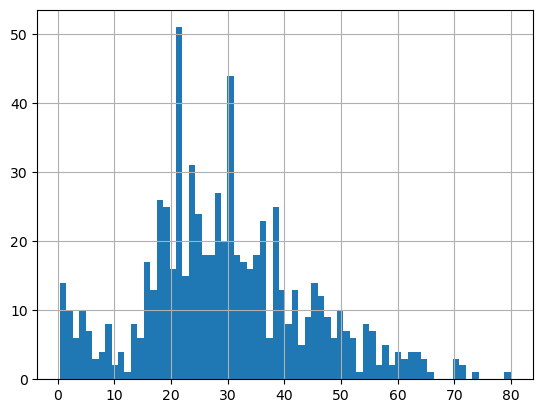

In [26]:
# Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [ ]:
<matplotlib.axes._subplots.AxesSubplot at 0xcab31d0>

In [28]:
titanic_df['Age'].mean() # Get the mean of Age

29.69911764705882

In [29]:
# We could also get a quick overall comparison of male,female,child

titanic_df['Person'].value_counts()

Person
male      537
female    271
child      83
Name: count, dtype: int64

C:\Users\saida\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\saida\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


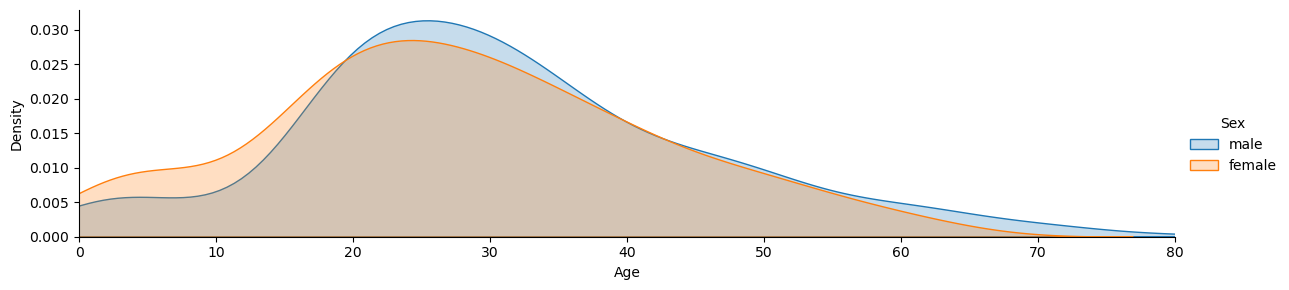

In [30]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xc29f048>

C:\Users\saida\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\saida\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\saida\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


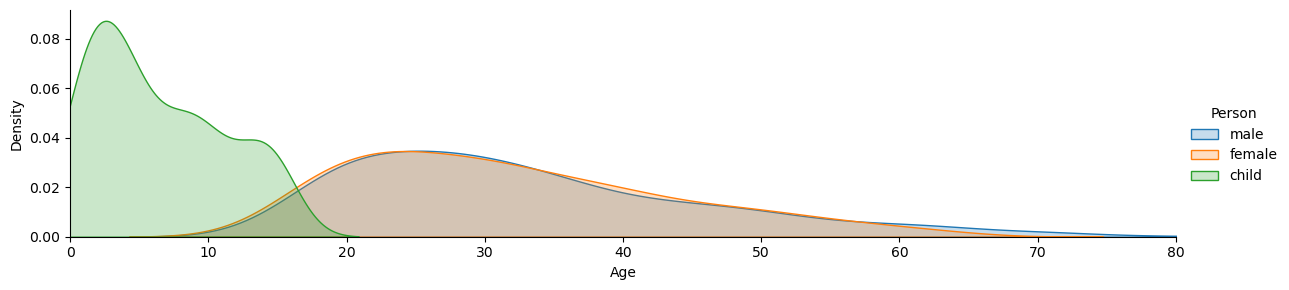

In [32]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xe4bac88>

C:\Users\saida\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\saida\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\saida\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


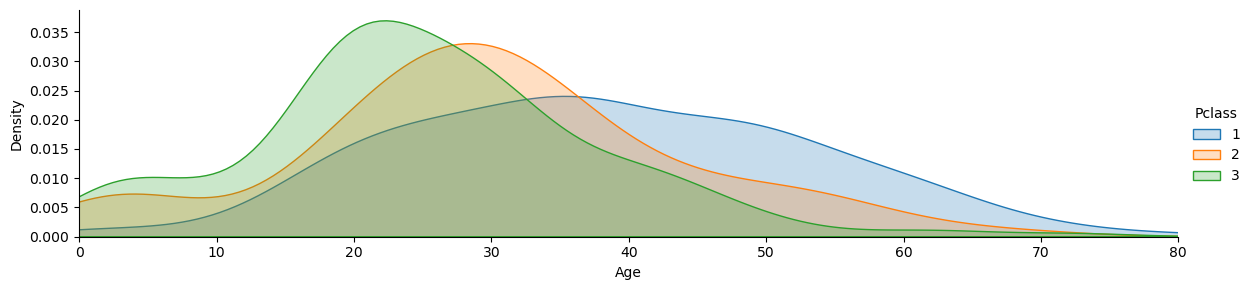

In [34]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xe4ae080>

In [36]:
# Let's get a quick look at our dataset again

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [37]:
# First we'll drop the NaN values and create a new object, deck

deck = titanic_df['Cabin'].dropna()

In [38]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [ ]:
# So let's grab that letter for the deck level with a simple for loop
# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xed42128>

In [ ]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin', data=cabin_df, palette='spring_d',kind='count')

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xf66d828>

In [44]:
titanic_df.head(10) # Let's take another look at our original data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [ ]:
# Now, make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values

sns.factorplot('Embarked', data=titanic_df, hue = 'Pclass', x_order=['C','Q','S'],kind='count') 

In [ ]:
<seaborn.axisgrid.FacetGrid at 0xf108630>

In [46]:
# Let's start by adding a new column to define alone

# add the parent/child column with the sibsp column

titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [47]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'


C:\Users\saida\AppData\Local\Temp\ipykernel_14972\2185057729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
C:\Users\saida\AppData\Local\Temp\ipykernel_14972\2185057729.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


In [48]:
# Check to make sure it worked

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [49]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

In [ ]:
# Now let's get a simple visualization!

sns.factorplot('Alone', data=titanic_df, palette='Purples', kind='count')

In [ ]:
<seaborn.axisgrid.FacetGrid at 0x10919128>

In [ ]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor', data=titanic_df, palette='plasma', kind='count')

In [ ]:
<seaborn.axisgrid.FacetGrid at 0x1096e550>

In [ ]:
# use a factor plot again, but now considering class

sns.factorplot('Pclass','Survived',data=titanic_df)

In [ ]:
<seaborn.axisgrid.FacetGrid at 0x10a2c780>

In [ ]:
# Let's use a factor plot again, but now considering class and gender

sns.factorplot('Pclass', 'Survived', hue='Person', data=titanic_df)

In [ ]:
<seaborn.axisgrid.FacetGrid at 0x10d5c6d8>

In [ ]:
<seaborn.axisgrid.FacetGrid at 0x1154a7f0>

In [ ]:
# Let's use a linear plot on age versus survival using hue for class seperation

# For X_bins
generations=[10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='inferno',x_bins=generations)

In [ ]:
<seaborn.axisgrid.FacetGrid at 0x1167f4a8>

In [54]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [55]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [56]:
cabin_df = pd.concat([cabin_df, titanic_df['Sex']], axis=1)

In [ ]:
cabin_df = pd.concat([cabin_df, titanic_df['Survived']], axis=1)